# Student Performance Indicator

Dataset information
The Dataset consists of 8 columns and 1000 rows.

* gender : sex of students -> (Male/female)
* race/ethnicity: ethnicity of students -> (Group A, B, C, D, E)
* parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
* lunch: having lunch before the test (standard or free/reduced)
* test preparation course: complete or not complete before the test
* math score
* reading score
* writing score

## Data Collection
kaggle = https://www.kaggle.com/datasets/jagdishchavan/student-performance

# Problem Statment:
This project tells how student performance(test score) is affected by other variables such as gender,Ethicity,Parental level of education , lunch, and test performace  course 

In [9]:
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

In [10]:
df = pd.read_csv("StudentsPerformance.csv")

In [11]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


### Missing Values

In [12]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

* There are no Missing Values

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


##  Check Duplicate

In [17]:
# Check for duplicates in the entire DataFrame
duplicates = df[df.duplicated()]
print("Duplicates found:")
print(duplicates)

Duplicates found:
Empty DataFrame
Columns: [gender, race/ethnicity, parental level of education, lunch, test preparation course, math score, reading score, writing score]
Index: []


* Duplicate not there

## Data Cleaning

In [21]:
# Display unique value counts for each specified column with formatting
print("======= Unique Value Counts =======\n")

print("1. Gender Column:")
print(df["gender"].value_counts(), "\n")

print("2. Race/Ethnicity Column:")
print(df["race/ethnicity"].value_counts(), "\n")

print("3. Parental Level of Education Column:")
print(df["parental level of education"].value_counts(), "\n")

print("4. Lunch Column:")
print(df["lunch"].value_counts(), "\n")

print("5. Test Preparation Course Column:")
print(df["test preparation course"].value_counts(), "\n")

print("===================================")


======= Unique Value Counts =======

1. Gender Column:
gender
female    518
male      482
Name: count, dtype: int64 

2. Race/Ethnicity Column:
race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64 

3. Parental Level of Education Column:
parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64 

4. Lunch Column:
lunch
standard        645
free/reduced    355
Name: count, dtype: int64 

5. Test Preparation Course Column:
test preparation course
none         642
completed    358
Name: count, dtype: int64 



## Check Imbalanced Data

In [22]:
# Function to check imbalance ratio for each column
def check_imbalance(column):
    value_counts = df[column].value_counts()
    most_frequent = value_counts.max()
    least_frequent = value_counts.min()
    imbalance_ratio = most_frequent / least_frequent
    return imbalance_ratio

# Checking imbalance for each column
columns = ["gender", "race/ethnicity", "parental level of education", "lunch", "test preparation course"]
for column in columns:
    ratio = check_imbalance(column)
    print(f"Imbalance Ratio for '{column}': {ratio:.2f}")


Imbalance Ratio for 'gender': 1.07
Imbalance Ratio for 'race/ethnicity': 3.58
Imbalance Ratio for 'parental level of education': 3.83
Imbalance Ratio for 'lunch': 1.82
Imbalance Ratio for 'test preparation course': 1.79


## Unique Values

In [25]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

## Statistics of Data

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


The Math scores are approximately normally distributed, while the Reading and Writing scores show a slight left skew, indicating that a few students with lower scores are pulling the averages down.

## Distribution 

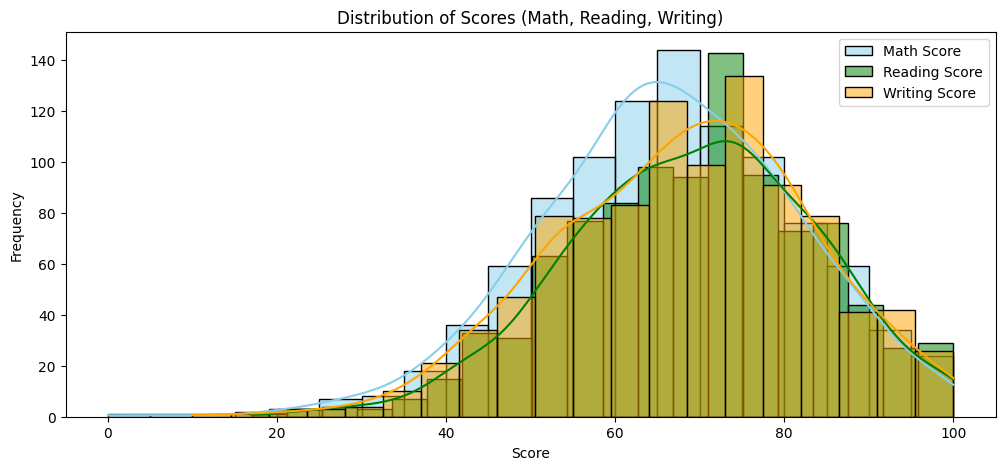

In [28]:
# Assuming your DataFrame is 'df' and the columns are 'math score', 'reading score', 'writing score'
plt.figure(figsize=(12, 5))

# Plot histograms for each score
sns.histplot(df['math score'], kde=True, label='Math Score', color='skyblue', bins=20)
sns.histplot(df['reading score'], kde=True, label='Reading Score', color='green', bins=20)
sns.histplot(df['writing score'], kde=True, label='Writing Score', color='orange', bins=20)

# Add labels and title
plt.title('Distribution of Scores (Math, Reading, Writing)')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()

# Show plot
plt.show()


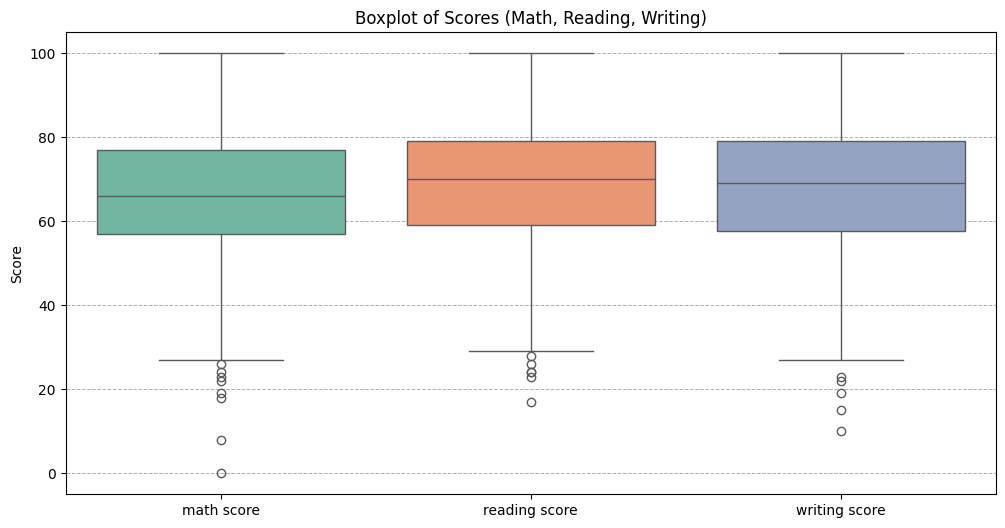

In [59]:
plt.figure(figsize=(12, 6))
# Plot boxplot for each score
sns.boxplot(data=df[['math score', 'reading score', 'writing score']], palette='Set2')
# Add labels and title
plt.title('Boxplot of Scores (Math, Reading, Writing)')
plt.ylabel('Score')
plt.grid(True, axis='y', linestyle='--', linewidth=0.7)
# Show plot
plt.show()

## NAN Value

In [31]:
print(df.isna().any().any())

False


In [35]:
numerical_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
categorial_feature = [feature for feature in df.columns if df[feature].dtype == 'O']
print("We have {} numerical features : {}".format(len(numerical_feature) , numerical_feature))
print("We have {} categorial features : {}".format(len(categorial_feature) , categorial_feature))

We have 3 numerical features : ['math score', 'reading score', 'writing score']
We have 5 categorial features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


## Feature Engineering

### Adding math score,reading score,writing score

In [37]:
df["test_score"] = df["math score"] + df["reading score"] + df["writing score"]

In [41]:
df2 = df.drop(columns=["math score", "reading score", "writing score"])

In [48]:
df2["average"] = (df2 ["test_score"]/3).round(2)

In [49]:
df2.head(1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,test_score,average
0,female,group B,bachelor's degree,standard,none,218,72.67


#### Check children with full marks

In [51]:
df["average"] = (df ["test_score"]/3).round(2)

In [52]:
df.head(1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,test_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67


In [53]:
# Count the number of students with perfect scores (100) in each subject
m = df[df["math score"] == 100]["average"].count()
r = df[df["reading score"] == 100]["average"].count()
w = df[df["writing score"] == 100]["average"].count()

# Print the counts
print("Number of students with a perfect math score:", m)
print("Number of students with a perfect reading score:", r)
print("Number of students with a perfect writing score:", w)

Number of students with a perfect math score: 7
Number of students with a perfect reading score: 17
Number of students with a perfect writing score: 14


In [60]:
# Count the number of students with scores less than or equal to 35 in each subject
m = df[df["math score"] <= 20 ]["average"].count()
r = df[df["reading score"] <= 20 ]["average"].count()
w = df[df["writing score"] <= 20]["average"].count()

# Print the counts
print("Number of students with math score <= 35:", m)
print("Number of students with reading score <= 35:", r)
print("Number of students with writing score <= 35:", w)

Number of students with math score <= 35: 4
Number of students with reading score <= 35: 1
Number of students with writing score <= 35: 3


* from above values we can see that student perfrorm bad in maths while they perform good i reading and writing

### Which Gender have great average

In [68]:
# Group by gender and calculate the overall average for each gender
gender_overall_avg = df2.groupby("gender")["average"].mean()

# Display the reCsult
print(gender_overall_avg)


gender
female    69.569498
male      65.837303
Name: average, dtype: float64


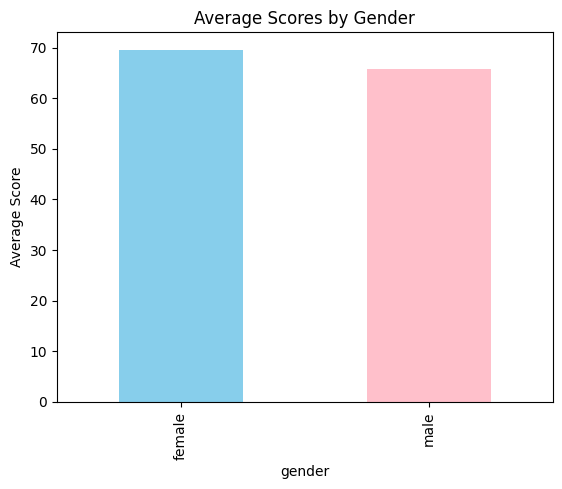

In [66]:
# Plot a bar chart
gender_overall_avg.plot(kind="bar", color=["skyblue", "pink"], title="Average Scores by Gender")
plt.ylabel("Average Score")
plt.show()

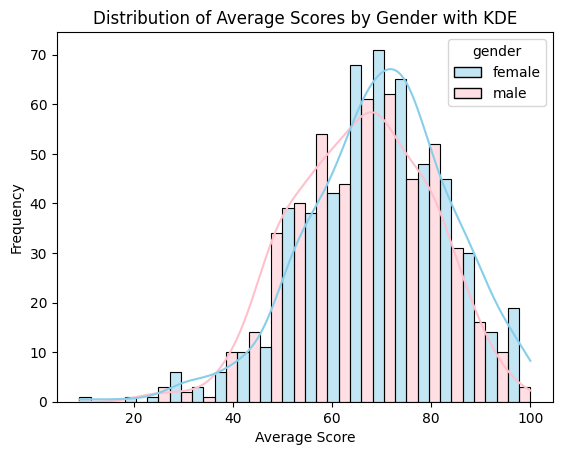

In [88]:

# Plot histogram with KDE overlay for 'average' scores by gender on the same axis
sns.histplot(data = df2, x="average", hue="gender", kde=True, bins=20, palette=["skyblue", "pink"], multiple="dodge")
# Add title and labels
plt.title("Distribution of Average Scores by Gender with KDE")
plt.xlabel("Average Score")
plt.ylabel("Frequency")

# Show plot
plt.show()


#### wrt to Total score

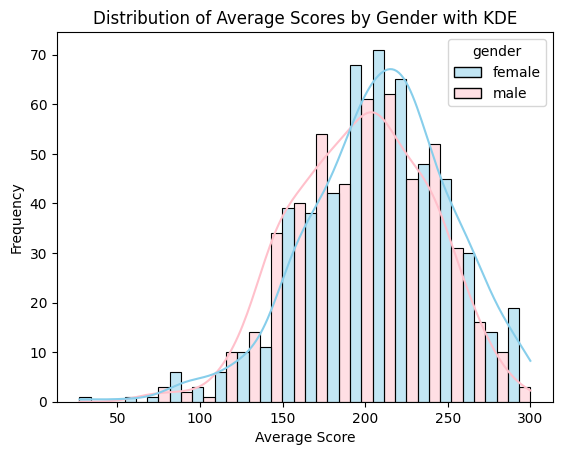

In [92]:

# Plot histogram with KDE overlay for 'average' scores by gender on the same axis
sns.histplot(data = df2, x="test_score", hue="gender", kde=True, bins=20, palette=["skyblue", "pink"], multiple="dodge")
# Add title and labels
plt.title("Distribution of Average Scores by Gender with KDE")
plt.xlabel("Average Score")
plt.ylabel("Frequency")

# Show plot
plt.show()


### Gender whoch have done there test preparation course

In [71]:
# Group by gender and test preparation course and count the occurrences
gender_test_prep = df.groupby(["gender", "test preparation course"]).size().reset_index(name="count")
# Display the result
print(gender_test_prep)

   gender test preparation course  count
0  female               completed    184
1  female                    none    334
2    male               completed    174
3    male                    none    308


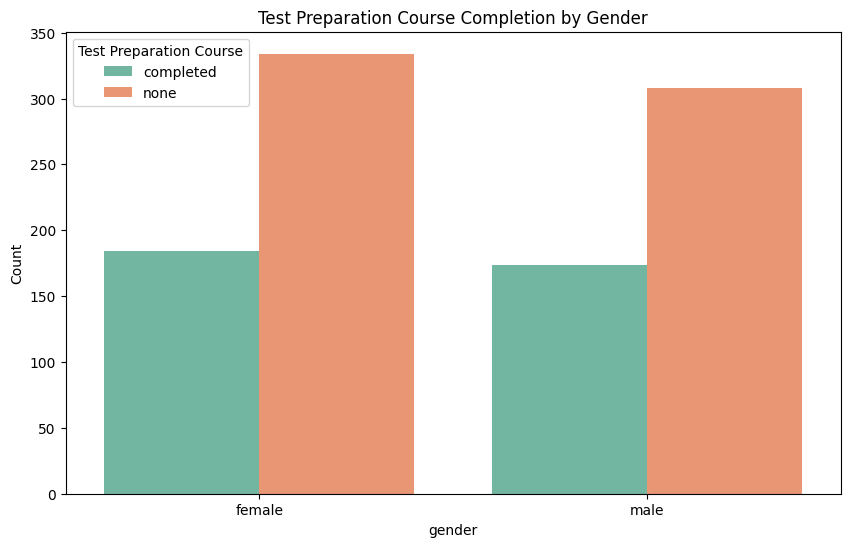

In [77]:
plt.figure(figsize=(10, 6))
# Plot the data as a bar chart
sns.barplot(data=gender_test_prep_counts, x="gender", y="count", hue="test preparation course", palette="Set2")
# Add title and labels
plt.title("Test Preparation Course Completion by Gender")
plt.ylabel("Count")
plt.legend(title="Test Preparation Course", loc='best')
plt.show()

* This Graph shows that female are the the one who have not completde tthe test preparation score before exam

In [93]:
df2.head(1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,test_score,average
0,female,group B,bachelor's degree,standard,none,218,72.67


#### Gender average with respect to lunch

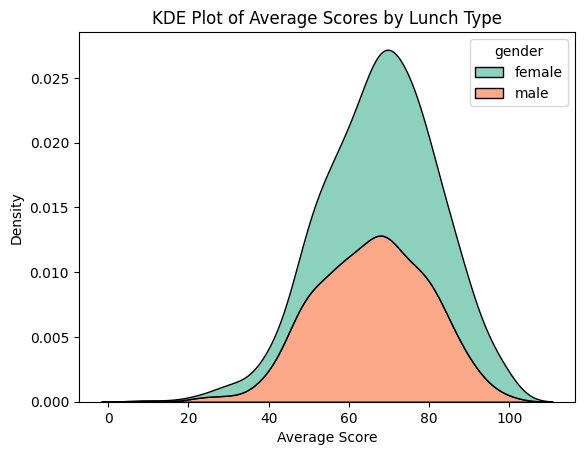

In [96]:
sns.kdeplot(data=df2,  x="average", hue="gender", multiple="stack", fill=True, palette="Set2")

# Add title and labels
plt.title("KDE Plot of Average Scores by Lunch Type")
plt.xlabel("Average Score")
plt.ylabel("Density")

plt.show()

In [97]:
# Calculate the average score by 'lunch' and 'gender'
lunch_gender_avg = df2.groupby(['lunch', 'gender'])['average'].mean().reset_index()
# Display the result
print(lunch_gender_avg)

          lunch  gender    average
0  free/reduced  female  63.215185
1  free/reduced    male  61.041988
2      standard  female  73.219848
3      standard    male  68.356361


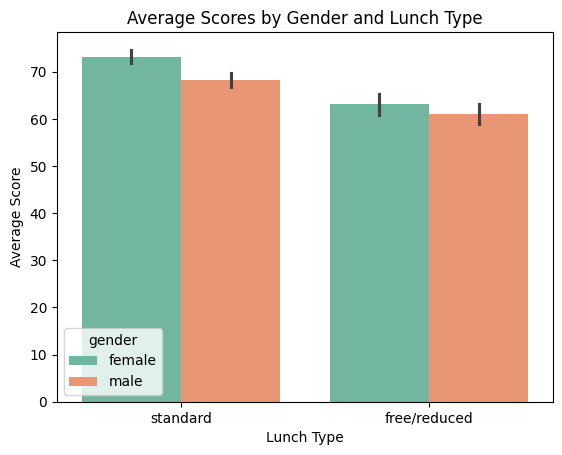

In [99]:
sns.barplot(data=df2, x="lunch", y="average", hue="gender", palette="Set2")

# Add title and labels
plt.title("Average Scores by Gender and Lunch Type")
plt.xlabel("Lunch Type")
plt.ylabel("Average Score")

# Show the plot
plt.show()

In [100]:
## let save the cleaned dataset
df.to_csv("cleaned.csv", index = False)